In [2]:
library(tidyverse)
ggplot2::theme_set(theme_bw())

In [3]:
library(showtext)
font_add_google(name = "Black Han Sans", family = "blackhansans")
showtext_auto()

Loading required package: sysfonts

Loading required package: showtextdb



In [4]:
setwd("C:/Users/이찬솔/Documents/ADP/problem/problem1")

# 1번
온,습도,조도,CO2농도에 따른 객실의 사용유무 판별     
종속변수 Occupancy, 0: 비어있음 , 1: 사용중    

데이터 경로 : /kaggle/input/adp-kr-p1/problem1.csv

### 1 - (1)
데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [5]:
problem1 <- read.csv("problem1.csv")
problem1 %>% glimpse
problem1 %>% is.na() %>% sum

Rows: 17,910
Columns: 7
$ date          <chr> "2015-02-02 14:19:59", "2015-02-02 14:22:00", "2015-02-0~
$ Temperature   <dbl> 23.71800, 23.72250, 23.75400, 23.76000, 23.75400, 23.736~
$ Humidity      <dbl> 26.29000, 26.12500, 26.20000, 26.26000, 26.29000, 26.390~
$ Light         <dbl> 578.4000, 493.7500, 488.6000, 568.6667, 509.0000, 510.00~
$ CO2           <dbl> 760.4000, 774.7500, 779.0000, 790.0000, 797.0000, 809.00~
$ HumidityRatio <dbl> 0.004772661, 0.004743773, 0.004766594, 0.004779332, 0.00~
$ Occupancy     <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,~


[1] 21

In [7]:
library(lubridate)
problem1$date <-  as_datetime(problem1$date)

In [8]:
problem1$date %>% summary

                 Min.               1st Qu.                Median 
"2015-02-02 14:19:59" "2015-02-06 19:20:15" "2015-02-10 03:05:29" 
                 Mean               3rd Qu.                  Max. 
"2015-02-10 15:51:46" "2015-02-14 20:13:44" "2015-02-18 09:19:00" 

- 수치형 변수별 히스토그램, 분포

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



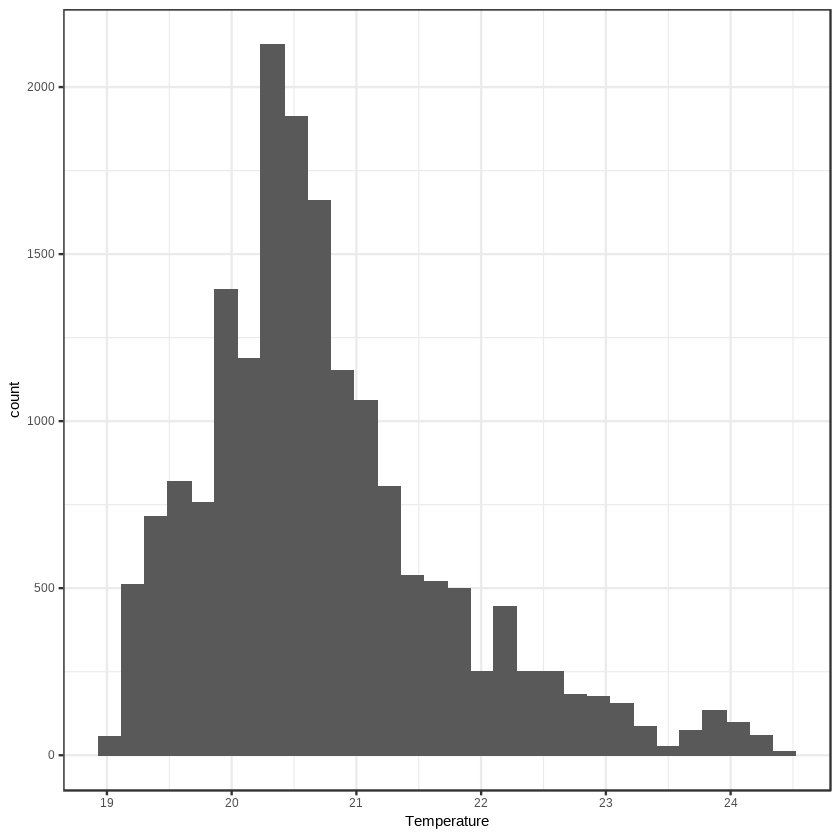

In [9]:
ggplot(problem1) + geom_histogram((aes(Temperature)))
# ggplot(problem1) + geom_histogram((aes(Humidity)))

- 종속변수 변수별 변수의 분포

factor(Occupancy),mean
<fct>,<dbl>
0,20.58483
1,21.98528


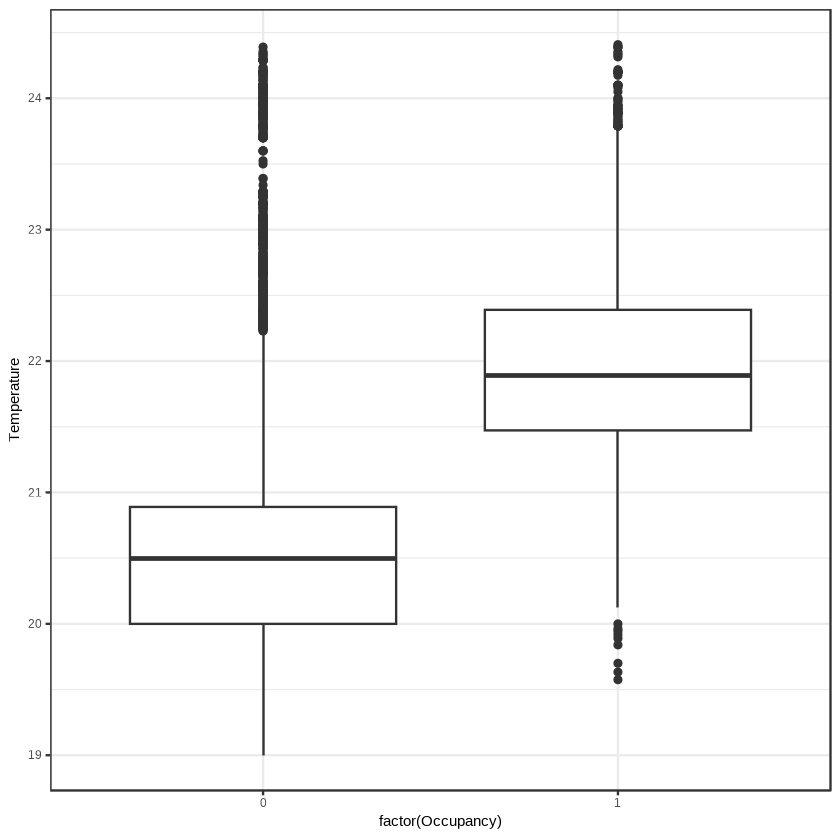

In [10]:
ggplot(problem1) + geom_boxplot(aes(factor(Occupancy), Temperature, group = Occupancy))

problem1 %>% 
    group_by(factor(Occupancy)) %>%
    summarise(mean = mean(Temperature))

# ggplot(problem1) + geom_boxplot(aes(factor(Occupancy), Humidity, group = Occupancy)) 

# ggplot(problem1) + geom_boxplot(aes(factor(Occupancy), Light, group = Occupancy)) 

# ggplot(problem1) + geom_boxplot(aes(factor(Occupancy), CO2, group = Occupancy)) 

# ggplot(problem1) + geom_boxplot(aes(factor(Occupancy), HumidityRatio, group = Occupancy)) 

- datetime형 변수별 변수들의 변동

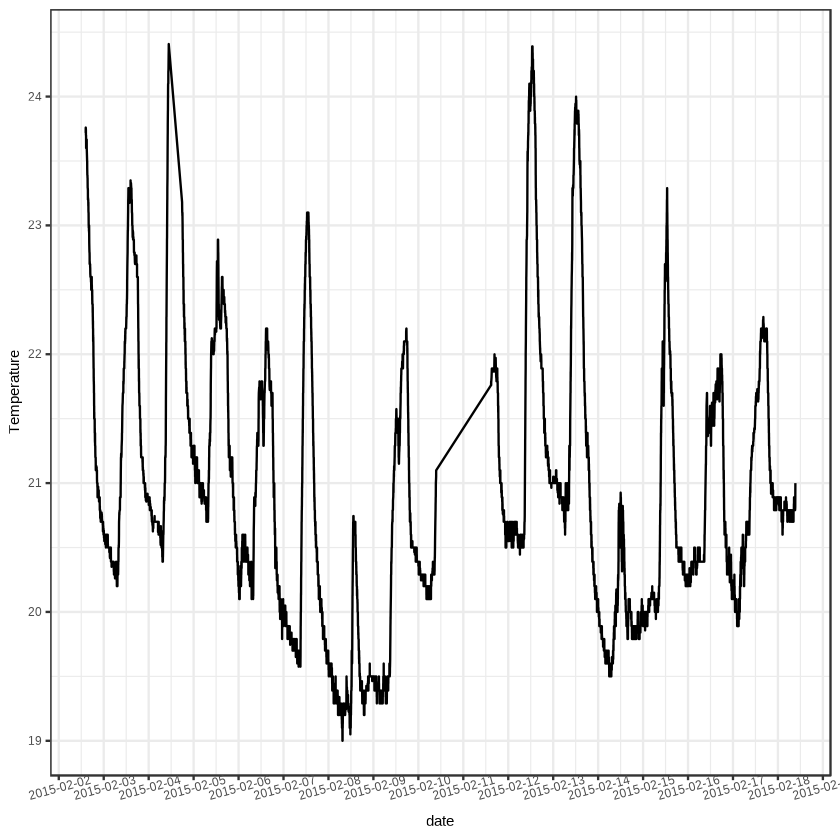

In [11]:
options(warn=-1)
problem1 %>% 
    ggplot(aes(date, Temperature)) + geom_line() +
    scale_x_datetime(breaks = "1 day") + 
    theme(axis.text.x = element_text(angle = 15))
# problem1 %>% ggplot(aes(date, problem1[, 3])) + geom_line()
# problem1 %>% ggplot(aes(date, problem1[, 4])) + geom_line()
# problem1 %>% ggplot(aes(date, problem1[, 5])) + geom_line()
# problem1 %>% ggplot(aes(date, problem1[, 6])) + geom_line()
options(warn=0)

In [12]:
problem1 %>% mutate(date1 = as.Date(date, "%Y-%m-%d")) %>%
    group_by(date1, factor(Occupancy)) %>% 
    count() %>% head

Warning message in as.POSIXlt.POSIXct(x, tz = tz):
"unknown timezone '%Y-%m-%d'"


date1,factor(Occupancy),n
<date>,<fct>,<int>
2015-02-02,0,378
2015-02-02,1,99
2015-02-03,0,841
2015-02-03,1,255
2015-02-04,0,827
2015-02-04,1,88


In [14]:
library("PerformanceAnalytics")

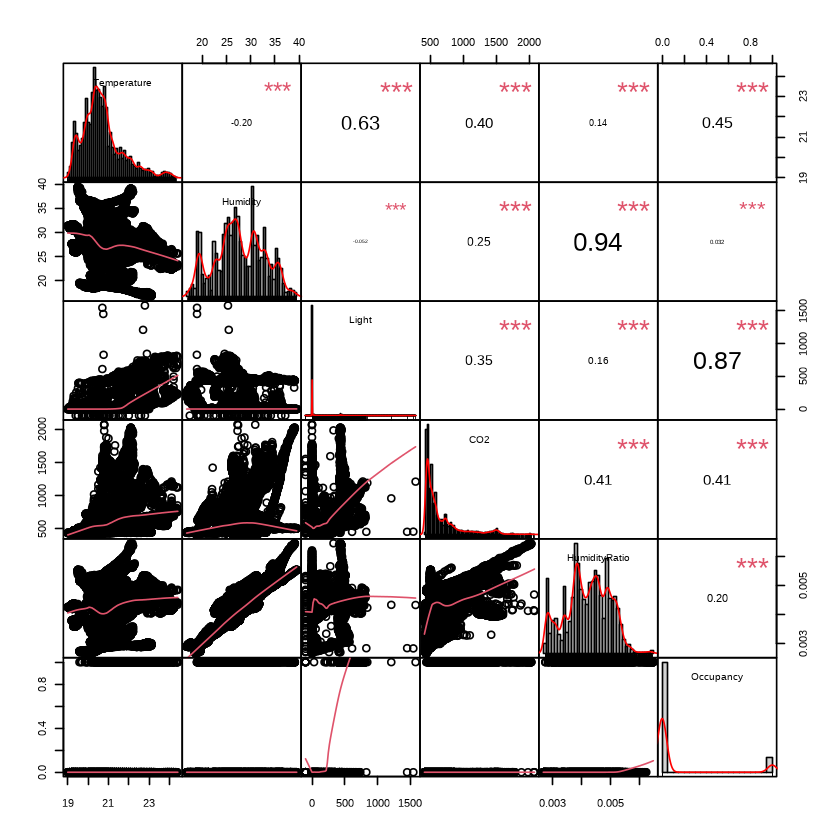

In [15]:
problem1 %>% na.omit %>% 
    select(-date) %>%
    chart.Correlation(histogram = , pch = "+")

- 수치형 변수중 종속변수에 가장 큰 영향을 미치는 변수는 Light이며, 모든 상관관계는 통계적으로 유의

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.0000000,-0.19915702,0.62590220,0.3993700,0.1379095,0.45362411
Humidity,-0.1991570,1.00000000,-0.05210926,0.2544461,0.9416654,0.03245072
Light,0.6259022,-0.05210926,1.00000000,0.3540621,0.1633162,0.86719454
CO2,0.3993700,0.25444614,0.35406208,1.0000000,0.4097353,0.40995938
HumidityRatio,0.1379095,0.94166539,0.16331621,0.4097353,1.0000000,0.19828967
Occupancy,0.4536241,0.03245072,0.86719454,0.4099594,0.1982897,1.00000000


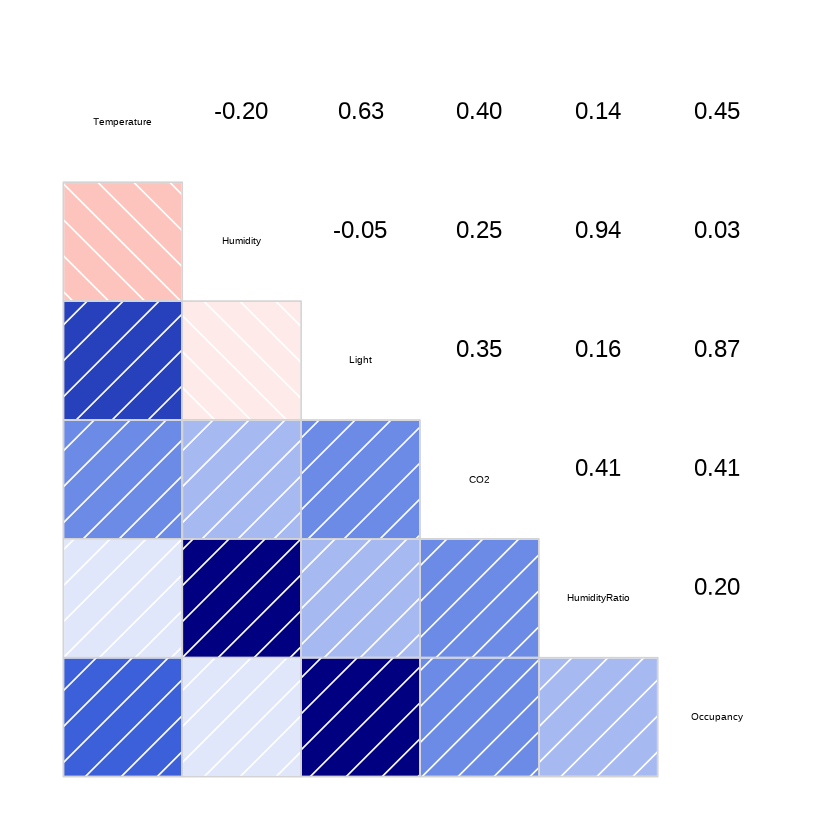

In [16]:
library("corrgram")

problem1 %>% na.omit %>% 
    select(-date) %>% cor
problem1 %>% na.omit %>% 
    select(-date) %>% cor %>% corrgram(upper.panel = panel.conf)

### 1 - (2)
결측치를 대체하는 방식 선택하고 근거제시, 대체 수행

In [17]:
problem1 <- read.csv("problem1.csv")

In [18]:
for (i in 1:ncol(problem1)) {
    cat(paste0(colnames(problem1)[i], " (", class(problem1[, i]), ") : ", sum(is.na(problem1[, i]))), "\n")
}

date (character) : 0 
Temperature (numeric) : 0 
Humidity (numeric) : 0 
Light (numeric) : 0 
CO2 (numeric) : 21 
HumidityRatio (numeric) : 0 
Occupancy (integer) : 0 


In [19]:
21 / nrow(problem1)

[1] 0.001172529

- 완전 분석법을 선택하여 결측값을 모두 제거
- 결측값이 데이터에서 차지하는 비율이 0.5%미만이기에, 자료가 삭제되어 발생하는 효율성 상실과, 통계적 추론 타당성 문제의 부작용이 감쇄됨

In [20]:
problem1 <- read.csv("problem1.csv")
problem1_clean <- na.omit(problem1)

### 1 - (3)
추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성

- 종속변수 Occupancy를 범주형 변수로 변경
- 수치형 변수들의 단위가 각각 상이함으로, 이에 따라 Min-Max 정규화를 시행

In [22]:
library(recipes)

In [23]:
problem1_clean$Occupancy <- as.factor(problem1_clean$Occupancy)

In [24]:
problem1_rec <- recipe(Occupancy ~ ., data = problem1_clean) %>%
    step_center(all_numeric()) %>%
    step_scale(all_numeric()) %>%
    prep(training = problem1_clean, retain = T) %>%
    juice()

- date변수를 파싱하여 월, 일, 시, 분, 초 별로 변수 생성

In [25]:
problem1_rec$date <- as.POSIXlt(problem1_rec$date)

In [26]:
problem1_rec <- problem1_rec %>%
    mutate(mon = unclass(problem1_rec$date)$mon,
           mday = unclass(problem1_rec$date)$mday,
           hour = unclass(problem1_rec$date)$hour,
           min = unclass(problem1_rec$date)$min,
           sec = unclass(problem1_rec$date)$sec) %>%
    select(-date)

In [27]:
problem1_rec %>% head

Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,mon,mday,hour,min,sec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<dbl>
2.988318,-0.2573837,2.966159,0.3940566,0.7917802,1,1,2,14,19,59
2.992848,-0.2900848,2.464166,0.4442319,0.7535430,1,1,2,14,22,0
3.024552,-0.2752206,2.433625,0.4590922,0.7837496,1,1,2,14,23,0
3.030591,-0.2633293,2.908439,0.4975540,0.8006109,1,1,2,14,23,59
3.024552,-0.2573837,2.554602,0.5220298,0.8055895,1,1,2,14,25,59
3.006435,-0.2375649,2.560532,0.5639882,0.8229227,1,1,2,14,28,0


### 2 - (1)
데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성


Occupancy,0,1
n,15790,2099


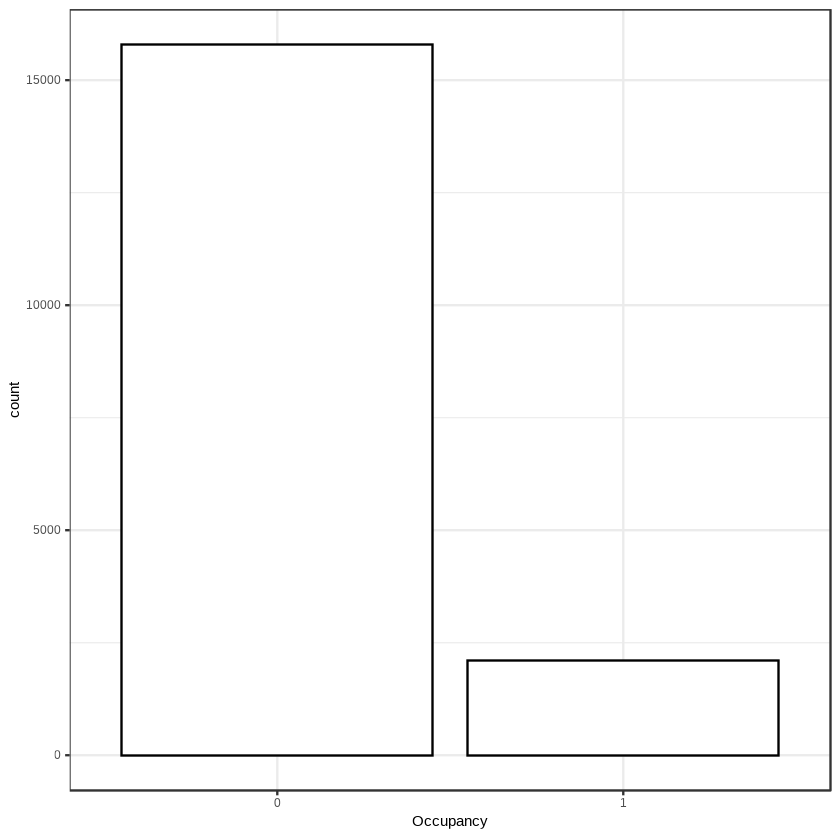

In [28]:
problem1_rec %>% group_by(Occupancy) %>%
    count() %>% t()
problem1_rec %>% ggplot(aes(Occupancy)) + geom_bar(fill = "white", col = "black")

- 위와같이 반응변수 Occupancy의 범주별 분포가 불균형한 것을 알 수 있다. => 데이터 불균형 존재

### 2 - (2)
- 오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

### 오버 샘플링 : 소수 클래스의 데이터를 복제 또는 생성하여 데이터의 비율을 맞추는 방법

#### 장점
- 정보가 손실되지 않음
- 알고리즘의 성능이 언더샘플링에 비해 증가

#### 단점
- 데이터 증가로 인한 계산시간의 증가
- 과적합을 초래하여, 검증의 성능이 감소할 가능성 존재

1. 랜덤 과대표집 (ROS) 
- 무작위로 소수 클래스 데이터를 복제하여 데이터의 비율을 맞추는 **간단한 방법**이지만, 데이터의 중복으로 인하여 과적합 문제 발생 가능성이 증가

2. SMOTE (Synthetic Minority Oversampling Technique)
- 소수 클래스에서 중심이 되는 데이터와 주변 데이터 사이에 가상의 직선을 만든 후, 그 위에 데이터를 추가하는 방법
- 랜덤 과대표집과 달리 중복을 사용하는 알고리즘이 아님 => ROS에 비해 과적합 문제 발생 가능성이 낮음, 하지만 마찬가지로 과적합 가능성 존재

### 2 - (3)
오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라

In [30]:
library(caret)
UpSamp <- caret::upSample(problem1_rec %>% select(-Occupancy), 
                           problem1_rec$Occupancy)

Class,0,1
n,15790,15790


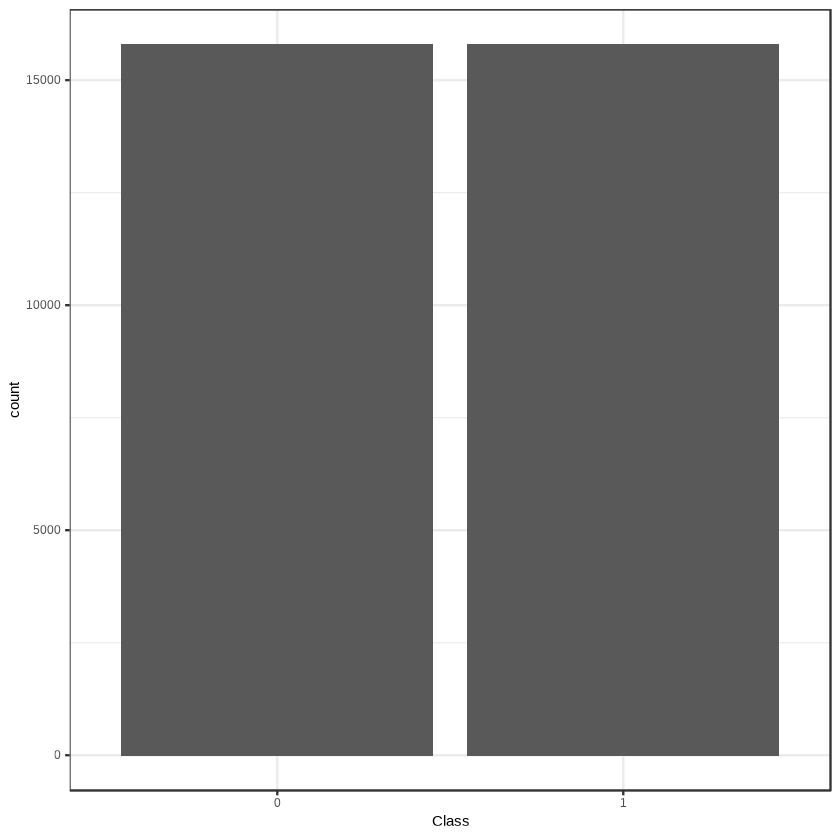

In [31]:
UpSamp %>% group_by(Class) %>%
    count() %>% t()
UpSamp %>% ggplot(aes(Class)) + geom_bar()

- 랜덤 과대표집(ROS) 시행결과, Occupancy의 범주별 수가 각각 15790으로 동일하게 되어 균형이 맞추어졌다.

In [33]:
library(smotefamily)

In [34]:
Smote <- smotefamily::SMOTE(problem1_rec %>% select(-Occupancy),
                            problem1_rec$Occupancy)

In [35]:
Smote_data <- Smote$data
Smote_data$class <- Smote_data$class %>% as.factor()

class,0,1
n,15790,14693


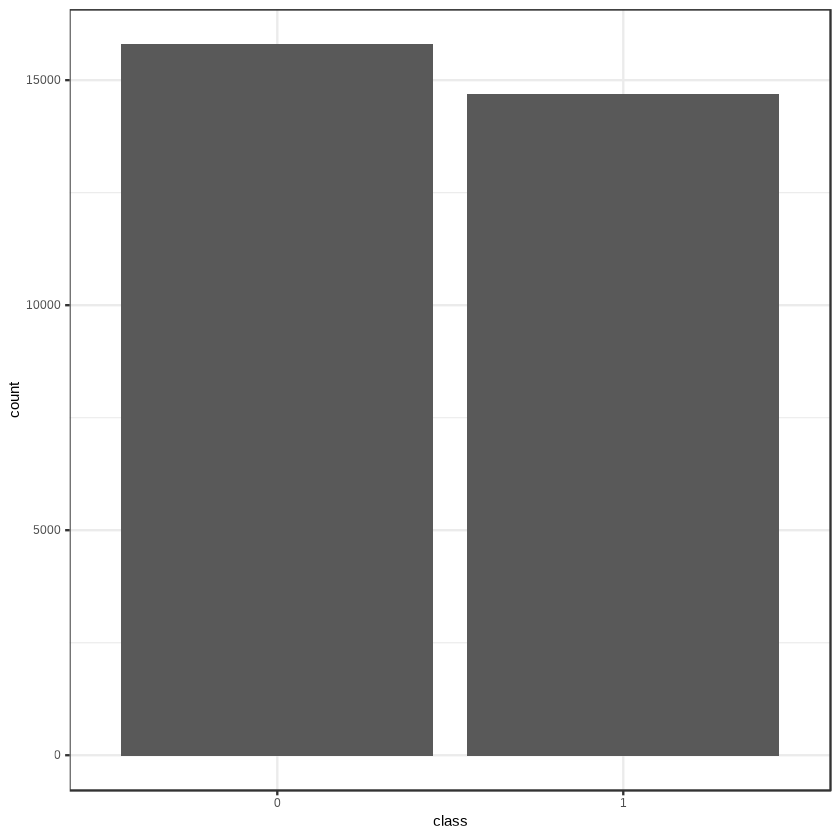

In [36]:
Smote_data %>% group_by(class) %>%
    count() %>% t()
Smote_data %>% ggplot(aes(class)) + geom_bar()

- SMOTE 시행결과, Occupancy의 "1"범주 수가 14693으로 증가하게 되어 균형이 맞추어졌다.

- problem1_rec : 오버샘플링 전

- UpSamp : ROS

- Smote_data : SMOTE

### 3 - (1)
속도측면, 정확도측면 모델 1개씩 선택, 선택 이유도 기술

#### 속도측면 : 로지스틱 회귀 분석
- 반응변수가 범주형인 경우 적용되는 기본적인 회귀 분석 모형
- 하이퍼 파라미터의 조정이 필요없음

#### 정확도측면 : 랜덤 포레스트
- 랜덤 포레스트 모델은 기본적으로 원 데이터를 대상으로 복원추출 방식으로 데이터의 양을 증가시킨 후 모델을 생성하기 대문에 데이터의 양이 부족해서 발생하는 과적합의 원인을 해결할 수 있다.
- 이는 오버 샘플링이 가진 단점인 과적합을 보완해줄 것

### 3 - (2)
위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기

- 로지스틱 회귀

In [37]:
library(rsample)

set.seed(1234)
split_raw <- initial_split(problem1_rec, 0.7)
train_raw <- training(split_raw)
test_raw <- testing(split_raw)

split_Up <- initial_split(UpSamp, 0.7)
train_Up <- training(split_Up)
test_Up <- testing(split_Up)

split_Smote <- initial_split(Smote_data, 0.7)
train_Smote <- training(split_Smote)
test_Smote <- testing(split_Smote)

In [38]:
model1_1 <- glm(Class ~ ., data = train_Up,
                family = binomial)

pred1_1 <- predict(model1_1, newdata = test_Up, type = "response") %>% round

mean(pred1_1 == test_Up$Class)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.9903948

In [39]:
model1_2 <- glm(class ~ ., data = train_Smote,
                family = binomial)

pred1_2 <- predict(model1_2, newdata = test_Smote, type = "response") %>% round

mean(pred1_2 == test_Smote$class)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.9915801

In [40]:
model1_3 <- glm(Occupancy ~ ., data = train_raw,
                family = binomial)

pred1_3 <- predict(model1_3, newdata = test_raw, type = "response") %>% round

mean(pred1_3 == test_raw$Occupancy)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.9860257

- ROS, SMOTE, 오버 샘플링 이전 데이터로 생성된 로지스틱 회귀 모형의 분류 정확도는 각각 98.997%, 99.06%, 98.6026%퍼센트의 높은 정확도를 가진다
- 정확도의 성능은 SMOTE, ROS, 오버 샘플링 이전 데이터 순으로 높으며, 오버 샘플링 이전 데이터의 성능이 가장 낮다.

- Random FOrest

In [42]:
library(randomForest)

In [53]:
model2_1 <- randomForest(Class ~ ., data = train_Up, 
                   mtry = round(sqrt(ncol(train_Up - 1))))

Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"


In [67]:
model2_1


Call:
 randomForest(formula = Class ~ ., data = train_Up, mtry = round(sqrt(ncol(train_Up -      1)))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.31%
Confusion matrix:
      0     1 class.error
0 10998    68 0.006144948
1     0 11040 0.000000000

In [54]:
pred2_1 <- predict(model2_1, test_Up)

In [55]:
mean(pred2_1 == test_Up$Class)

[1] 0.9977834

In [56]:
model2_2 <- randomForest(class ~ ., data = train_Smote, 
                   mtry = round(sqrt(ncol(train_Smote - 1))))

Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"


In [66]:
model2_2


Call:
 randomForest(formula = class ~ ., data = train_Smote, mtry = round(sqrt(ncol(train_Smote -      1)))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.4%
Confusion matrix:
      0     1 class.error
0 10936    65 0.005908554
1    20 10317 0.001934797

In [57]:
pred2_2 <- predict(model2_2, test_Smote)

In [58]:
mean(pred2_2 == test_Smote$class)

[1] 0.9966102

In [59]:
model2_3 <- randomForest(Occupancy ~ ., data = train_raw, 
                   mtry = round(sqrt(ncol(train_raw - 1))))

Warning message in Ops.factor(left, right):
"'-' not meaningful for factors"


In [65]:
model2_3


Call:
 randomForest(formula = Occupancy ~ ., data = train_raw, mtry = round(sqrt(ncol(train_raw -      1)))) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 0.51%
Confusion matrix:
      0    1 class.error
0 11011   38 0.003439225
1    26 1447 0.017651052

In [60]:
pred2_3 <- predict(model2_3, test_raw)

In [61]:
mean(pred2_3 == test_raw$Occupancy)

[1] 0.9927334

- ROS, SMOTE, 오버 샘플링 이전 데이터로 생성된 로지스틱 회귀 모형의 분류 정확도는 각각 99.7783%, 99.661%, 99.2733%퍼센트의 높은 정확도를 가진다
- 정확도의 성능은 ROS, SMOTE, 오버 샘플링 이전 데이터 순으로 높으며, 오버 샘플링 이전 데이터의 성능이 가장 낮다.
- OOB 검정 에러율 역시 ROS, SMOTE, 오버 샘플링 이전 데이터 순으로 낮다.

### 3 - (3)
위 예측결과 사용해서 오버샘플링이 미친 영향에 대해 작성하라



- 오버 샘플링한 데이터로 생성한 모형이, 오버 샘플링 이전 데이터로 생성한 모형보다 전체적으로 분류 정확도가 높음을 알 수 있다.
- 이는 오버 샘플링의 장점인 "알고리즘 성능의 증가"라고 해석 할 수 있다.

# 2번
공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오    
데이터 경로 : /kaggle/input/adp-kr-p1/problem2.csv

In [69]:
problem2 <- read.csv("problem2.csv")
sum(is.na(problem2))

[1] 0

In [72]:
glimpse(problem2)
problem2 %>% print
mean(problem2$life.span)

Rows: 12
Columns: 2
$ name      <chr> "sample1", "sample2", "sample3", "sample4", "sample5", "samp~
$ life.span <int> 10000, 9000, 9500, 10000, 10000, 8900, 9900, 10100, 10300, 1~
       name life.span
1   sample1     10000
2   sample2      9000
3   sample3      9500
4   sample4     10000
5   sample5     10000
6   sample6      8900
7   sample7      9900
8   sample8     10100
9   sample9     10300
10 sample10     10020
11 sample11     10000
12 sample12      9800


[1] 9793.333

### 1
귀무가설, 연구가설 세우기

- 귀무가설 : 진공관 수명이 (life.span)의 평균이 10000시간이 이다.
- 대립가설 : 진공관 수명의 평균이 10000시간이 아니다.

### 2
유효한 데이터의 개수는?

In [85]:
library("BSDA")

In [91]:
sign <- SIGN.test(problem2$life.span, alternative = "two.sided", md = 10000)
(int <- sign$Confidence.Intervals)

,Conf.Level,L.E.pt,U.E.pt
Lower Achieved CI,0.8540,9800.000,10000.00
Interpolated CI,0.9500,9531.909,10017.87
Upper Achieved CI,0.9614,9500.000,10020.00


In [98]:
problem2 %>% 
    filter(problem2$life.span > int[2, 2] & problem2$life.span < int[2, 3])

name,life.span
<chr>,<int>
sample1,10000
sample4,10000
sample5,10000
sample7,9900
sample11,10000
sample12,9800


- 유의수준 5%에서 유효한 데이터의 개수는 6개

### 3
검정통계량 및 연구가설 채택 여부를 작성하라

In [88]:
(sign <- SIGN.test(problem2$life.span, alternative = "two.sided", md = 10000))


	One-sample Sign-Test

data:  problem2$life.span
s = 3, p-value = 0.7266
alternative hypothesis: true median is not equal to 10000
95 percent confidence interval:
  9531.909 10017.873
sample estimates:
median of x 
      10000 

Achieved and Interpolated Confidence Intervals: 

                  Conf.Level   L.E.pt   U.E.pt
Lower Achieved CI     0.8540 9800.000 10000.00
Interpolated CI       0.9500 9531.909 10017.87
Upper Achieved CI     0.9614 9500.000 10020.00


In [99]:
# wilcox.test(problem2$life.span, alternative = "two.sided", mu = 10000)

- 검정통계량 s는 3이며 P-value > 0.05 => 귀무가설 기각 불가 => 진공관 수명의 평균은 10000시간이 아니다.

# 3번
코로나 시계열 데이터     
데이터 출처(후처리과정 미포함) :https://www.kaggle.com/antgoldbloom/covid19panels?select=country_panel.csv    
     
데이터 경로 : /kaggle/input/adp-kr-p1/problem3_covid.csv

In [103]:
problem3 <- read.csv("problem3_covid2.csv")

In [108]:
sum(is.na(problem3))
problem3 %>% glimpse

[1] 233

Rows: 11,895
Columns: 3
$ location  <chr> "Austria", "Austria", "Austria", "Austria", "Austria", "Aust~
$ date      <chr> "2021-01-01", "2021-01-02", "2021-01-03", "2021-01-04", "202~
$ new_cases <dbl> 2096, 1391, 1466, 1642, 2311, 2469, 2540, 2063, 2278, 1651, ~


In [109]:
problem3$date <- as.Date(problem3$date, "%Y-%m-%d")

In [110]:
for (i in 1:ncol(problem3)) {
    cat(paste0(colnames(problem3)[i], " (", class(problem3[, i]), ") : ", sum(is.na(problem3[, i]))), "\n")
}

location (character) : 0 
date (Date) : 0 
new_cases (numeric) : 233 


In [154]:
problem3 %>% group_by(location) %>%
    summarise(NAs = sum(is.na(new_cases))) %>% arrange(-NAs) %>% head

location,NAs
<chr>,<int>
Palau,233
Austria,0
Bangladesh,0
Bhutan,0
Chile,0
Colombia,0


### 1 
ACF 함수에 따른 거리 계산

In [112]:
library(forecast)
library(TTR)

In [163]:
problem3$location <- problem3$location %>% factor
length(levels(problem3$location))

[1] 39

### 2
계층적 군집 분석을 위해 덴드로그램 작성

# 4번
아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라    
![image](https://github.com/Datamanim/datarepo/blob/main/adp/p1/problem4.png?raw=true)


### 1번
귀무가설, 연구가설 세우기

In [199]:
score <- c("1.5 ~ 2.5", "2.5 ~ 3.5", "3.5 ~ 4.5")
major <- c("사회과학", "자연과학", "공학")
problem4 <- matrix(nrow = 3, ncol = 3, data = c(15, 60, 24, 25, 69, 5, 10 ,77, 13),
                   byrow = F)

In [220]:
rownames(problem4) <- score
colnames(problem4) <- major
(table <- addmargins(problem4))

,사회과학,자연과학,공학,Sum
1.5 ~ 2.5,15,25,10,50
2.5 ~ 3.5,60,69,77,206
3.5 ~ 4.5,24,5,13,42
Sum,99,99,100,298


학과별 학생의 수는 각각 99, 99, 100으로 유사함을 알 수 있다 => 사전 열의 합이 사전 설정되었다는 추정 => 동질성 검정

- 귀무가설 : 학과에 따라 성적의 차이가 있다.
- 대립가설 : 학과에 따라 성적의 차이가 없다

### 2번
학과와 성적이 독립일 경우의 기댓값을 구하시오

In [230]:
E <- matrix(nrow = 3, ncol = 3)
for (i in 1:3) {
    for (j in 1:3) {
        E[i, j] <- table[i, 4] * table[4, j] / 298
    }
}
rownames(E) <- score
colnames(E) <- major
E

,사회과학,자연과학,공학
1.5 ~ 2.5,16.61074,16.61074,16.77852
2.5 ~ 3.5,68.43624,68.43624,69.12752
3.5 ~ 4.5,13.95302,13.95302,14.09396


### 3번
검정통계량 구하고 연구가설의 채택여부 작성

In [213]:
library("gmodels")
ct <- CrossTable(problem4, chisq = T)
# chisq.test(problem4)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  298 

 
             |  
             |  사회과학 |  자연과학 |      공학 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
   1.5 ~ 2.5 |        15 |        25 |        10 |        50 | 
             |     0.156 |     4.237 |     2.739 |           | 
             |     0.300 |     0.500 |     0.200 |     0.168 | 
             |     0.152 |     0.253 |     0.100 |           | 
             |     0.050 |     0.084 |     0.034 |           | 
-------------|-----------|-----------|-----------|-----------|
   2.5 ~ 3.5 |        60 |        69 |        77 |       206 | 
             |     1.040 |     0.005 |     0.897 |           | 
             |     0.291 |     0.335 |     0.374 |     0.691 | 
             |     0.606 |     0.6

- 검정통계량 : 22.13692, P-value < 0.05 => 귀무가설 기각 
- 학과와 성적의 관련성은 없는 것으로 나타났다.